# Random Forest

In [1]:
import pandas as pd
import numpy as np
import pyodbc 
from patsy import dmatrices
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=LAPTOP-FLVDOFJN\SQLEXPRESS;"
                      "Database=DPR;"
                      "Trusted_Connection=yes;")

sql = """
SELECT 
                                [umo].[umowa]
                                ,[umo].[podumo]
                                ,[umo].[oferta]
                                ,[umo].[FFINRPFH_czy]
                                ,[umo].[KLi_NIP]
                                ,[umo].[KLi_NAZWASKR]
                                ,[umo].[KLi_NAZWA]
                                ,[umo].[PORECZYCIEL_CZY]
                                ,[umo].[PORECZYCIEL_NIP]
                                ,[umo].[TR_DTZAWC]
                                ,[umo].[TR_DTZAWC_MC]
                                ,[umo].[TR_DTZAWC_Q]
                                ,[umo].[TR_DTZAWC_RokOkres]
                                ,[umo].[TR_DTZAWC_H]
                                ,[umo].[TR_DTZAWC_Y]
                                ,[umo].[TR_D30M3]
                                ,[umo].[TR_D60M3]
                                ,[umo].[TR_D60M6]
                                ,[umo].[TR_D60M12]
                                ,[umo].[TR_D60M24]
                                ,[umo].[TR_D60M36]
                                ,[umo].[TR_D90M12]
                                ,[umo].[TR_D90M24]
                                ,[umo].[TR_D90M36]
                                ,[umo].[TR_STATUS_UMOWY_BIEZ]
                                ,[umo].[TR_POZIOM_wykonanie]
                                ,[umo].[TR_POZIOM_estymator]
                                ,[umo].[TR_ANEKS_dataZawarciaUmowyAneksowanej]
                                ,[umo].[TR_ANEKS_dataZawarciaAneksu]
                                ,[umo].[TR_ANEKS_dataPierwszejZmianyKlienta]
                                ,[umo].[TR_ANEKS_RODZAJ_id]
                                ,[umo].[TR_HANDLOWIEC_SIEC]
                                ,[umo].[TR_DOSTAWCA_NIP]
                                ,[umo].[TR_DOSTAWCA_KATEGORIA]
                                ,[umo].[TR_DOSTAWCA_KLASYFIKACJA]
                                ,[umo].[TR_DOSTAWCA_LSD]
                                ,[umo].[TR_DOSTAWCA_LSD_MiU]
                                ,[umo].[TR_DOSTAWCA_LSD_TRUCK]
                                ,[umo].[TR_DOSTAWCA_LSD_OSD]
                                ,[umo].[TR_TYP_LEASINGU]
                                ,[umo].[TR_TYP_UMOWY]
                                ,[umo].[TR_WARIANT]
                                ,[umo].[TR_PROCEDURA]
                                ,[umo].[TR_HARMONOGRAM]
                                ,[umo].[TR_HARMONOGRAM_czy_odrocz]
                                ,[umo].[TR_LEAS_ZWROTNY_CZY]
                                ,[umo].[TR_OKRES]
                                ,[umo].[TR_WO]
                                ,[umo].[TR_IRR]
                                ,[umo].[TR_WARTOSC_WYKUPU]
                                ,[umo].[TR_WARTOSC_WYKUPU_UDZIAL_CI]
                                ,[umo].[TR_WARTOSC_WYKUPU_UDZIAL_RAT]
                                ,[umo].[TR_WARTOSC_WYKUPU_UDZIAL_KON]
                                ,[umo].[TR_CI]
                                ,[umo].[TR_CI_PROC]
                                ,[umo].[TR_PD_2013]
                                ,[umo].[TR_EL_2013]
                                ,[umo].[KL_KAT_ZAW_2013]
                                ,[umo].[KL_SCORING_2013]
                                ,[umo].[PRZEDM_asset]
                                ,[umo].[PRZEDM_asset_DPR]
                                ,[umo].[PRZEDM_OPIS_PRZEDMIOTU]
                                ,[umo].[PRZEDM_OPIS_PRZEDMIOTU_GRUPA]
                                ,[umo].[PRZEDM_OPIS_PRZEDMIOTU_GRUPA2]
                                ,[umo].[PRZEDM_ROKPROD]
                                ,[umo].[PRZEDM_WIEK_URUCH]
                                ,[umo].[PRZEDM_WIEK_KONIEC_UM]
                                ,[umo].[PRZEDM_KLASA]
                                ,[umo].[PRZEDM_LUX]
                                ,[umo].[PRZEDM_PREMIUM]
                                ,[umo].[PRZEDM_MARKA]
                                ,[umo].[PRZEDM_MARKA_ID]
                                ,[umo].[PRZEDM_MODEL]
                                ,[umo].[PRZEDM_SEGMENT]
                                ,[umo].[PRZEDM_STAWKA_AMORTYZACJI]
                                ,[umo].[KL_KAT_ZAW_GRUPA]
                                ,[umo].[KL_ZRODLO_DANYCH]
                                ,[umo].[KL_PKD2007_MAP]
                                ,[umo].[KLi_PKD2007_MAP]
                                ,[umo].[KL_DZIALALNOSC_OPIS]
                                ,[umo].[KL_DZIALALNOSC]
                                ,[umo].[KL_nTSL]
                                ,[umo].[KL_nBUD]
                                ,[umo].[KL_nBUD_nTSL]
                                ,[umo].[KL_nWZP]
                                ,[umo].[KL_BRANZA_OPIS]
                                ,[umo].[KL_BRANZA_OPIS_GRUPA]
                                ,[umo].[KL_BRANZA_PREF_ZAW]
                                ,[umo].[KL_BRANZA_PREF_BIEZ]
                                ,[umo].[KL_TYP_DZIALALNOSCI]
                                ,[umo].[KL_KLASA_PRZEWOZNIKA]
                                ,[umo].[KL_DATAROZPDZIAL]
                                ,[umo].[KL_CZASPROWDZIALGOSP_L]
                                ,[umo].[KL_FORMA_DZIAL]
                                ,[umo].[KL_STAN_CYWILNY]
                                ,[umo].[KL_LICZBA_PRAC]
                                ,[umo].[KL_WIEK_PESELDEC]
                                ,[umo].[KL_DOCHOD_RB]
                                ,[umo].[KL_DOCHOD_RU]
                                ,[umo].[KL_DOCHOD_MC]
                                ,[umo].[KL_DOCHOD_12M]
                                ,[umo].[KL_OBROT_RB]
                                ,[umo].[KL_OBROT_RU]
                                ,[umo].[KL_OBROT_12M]
                                ,[umo].[KL_OBROT_MAX]
                                ,[umo].[KL_OBROT_MC]
                                ,[umo].[KL_ZYSK_RU]
                                ,[umo].[KL_LICZBA_MIES_RU]
                                ,[umo].[KL_LICZBA_MIES_RB]
                                ,[umo].[KL_FIN_RODZAJ_KSIEGOWOSCI_RU_id]
                                ,[umo].[KL_FIN_RODZAJ_KSIEGOWOSCI_RB_id]
                                ,[umo].[KL_FIN_TYP_DOK_RU_id]
                                ,[umo].[KL_FIN_TYP_DOK_RB_id]
                                ,[umo].[KL_FIN_RYCZALT_czy]
                                ,[umo].[KL_RENT_RU]
                                ,[umo].[KL_RENT_RB]
                                ,[umo].[KL_RENT_MC]
                                ,[umo].[KL_DYNAM_DOCHOD]
                                ,[umo].[KL_DYNAM_OBROT]
                                ,[wyk].[TR_Default_FirstDate30]
                                ,[wyk].[TR_Default_FirstDate60]
                                ,[wyk].[TR_Default_FirstDate90]
                                ,[wyk].[TR_FRAUD_DataStatusu]
                              FROM 
                                [DPR].[dbo].[mk_dane_umow] [umo]
                                inner join
                                [DPR].[dbo].[mk_SCORE_umowy_wykonanie] [wyk] on [umo].[umowa] = [wyk].[umowa]
                              WHERE 
                                [TR_DTZAWC_RokOkres] >= 201101
                                and [umo].[FFINRPFH_czy] = 1
"""
#df = pandas.io.sql.read_sql(sql, conn)
df = pd.read_sql(sql, conn)
conn.close()

In [2]:
print(df.shape)

(115350, 123)


In [57]:
path_var = 'E:\\Wojtek\\_DSCN_\\Analiza_danych\\Leas\\data_set\\'
var_df = pd.read_csv(path_var+'variables.csv', sep=';')
var_df.columns
var_df.type_var.value_counts()
var_df.head(10)
var_df.type_pred.value_counts(dropna=False)
print(type(var_df))


#predictors = var_df.variable[ (var_df.type_var == 'pred') | (var_df.variable == target_name) ]
predictors = var_df.variable[ var_df.type_var == 'pred' ]
type(predictors)
#type(list)(predictors)
target_name = 'TR_D90M12'

col = df.columns.isin(predictors)+df.columns.isin([target_name])  # to raczej nie jest eleganckie rozwiązanie

df_filtered = df.loc[ (df.FFINRPFH_czy == 1) 
            & (df.TR_ANEKS_RODZAJ_id  == 0) 
            & (df.TR_POZIOM_wykonanie == 1)  
            & (df.PORECZYCIEL_CZY == 0)
            & (pd.isnull(df.TR_FRAUD_DataStatusu)) 
            & (~ pd.isnull(df.loc[:,target_name])), col]
df_filtered.shape

df_filtered2 = df_filtered.dropna(axis = 0, how = 'any')
print(df_filtered2.shape)

#-- RandomForestClassifier nie przyjmuje zmiennych nienumerycznych oraz NaN/np.inf! Potrzebne jest wprowadzenie kodowania
var_in_model      = ['KL_CZASPROWDZIALGOSP_L','TR_CI_PROC', 'PRZEDM_WIEK_KONIEC_UM','KL_DYNAM_OBROT','TR_OKRES','KL_WIEK_PESELDEC','KL_RENT_RB']
var_text          = ['PRZEDM_asset_DPR','KL_BRANZA_OPIS', 'KL_FORMA_DZIAL']
df_filtered2_dumm = pd.get_dummies(df_filtered2.loc[:,var_text], prefix='Categ', columns=var_text, drop_first = True, dummy_na = False) # drop_first - wyrzucamy pierwszy poziom; w macierzy jest n-1 wartoci
print(df_filtered2_dumm.shape)
df_filtered3 = pd.concat([df_filtered2.loc[:,df_filtered2.columns.isin(var_in_model)], df_filtered2_dumm], axis=1)
y = df_filtered2.loc[:, target_name]

print(df_filtered3.shape)

<class 'pandas.core.frame.DataFrame'>
(59611, 75)
(59611, 34)
(59611, 41)


### Podział próby

In [58]:
from sklearn.model_selection import train_test_split
df_filtered3_train, df_filtered3_test, y_train, y_test = train_test_split(df_filtered3, y, test_size = 0.4, random_state=111)


In [59]:
from sklearn.ensemble import RandomForestClassifier
import math
#model_rf = RandomForestClassifier(n_estimators=100, max_depth=7, criterion = 'entropy', max_features = math.sqrt(df_filtered3_train.shape[1]))
model_rf = RandomForestClassifier(n_estimators=200, max_depth=6, 
                                  criterion = 'entropy', max_features = math.floor(df_filtered3_train.shape[1]/3),
                                 random_state = 111,
                                 min_samples_leaf = 60,
                                 verbose=1)

#criterion = 'entropy', 'gini'

#Fit the model:
model_rf.fit(df_filtered3_train,y_train)

#Make predictions on test set
predictions_rf = model_rf.predict_proba(df_filtered3_test)
fit_rf = model_rf.predict_proba(df_filtered3_train)

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished


Ocena modelu

KL_CZASPROWDZIALGOSP_L                   0.204248
TR_CI_PROC                               0.153707
KL_DYNAM_OBROT                           0.146127
PRZEDM_WIEK_KONIEC_UM                    0.115350
KL_WIEK_PESELDEC                         0.072827
KL_RENT_RB                               0.071716
TR_OKRES                                 0.064085
Categ_Spółka z o.o.                      0.037890
Categ_OSD                                0.021352
Categ_Budownictwo                        0.017940
Categ_Prywatny_sekt_opieki_zdrowotnej    0.016653
Categ_ME excl. YG                        0.012128
Categ_Hotele_restauracje                 0.010943
Categ_Spółka cywilna                     0.009801
Categ_Spółka jawna                       0.009309
Categ_TRUCK                              0.006458
Categ_OF prow. działalność               0.005199
Categ_Uslugi                             0.004574
Categ_Wolne_zawody                       0.004008
Categ_Transport                          0.003964


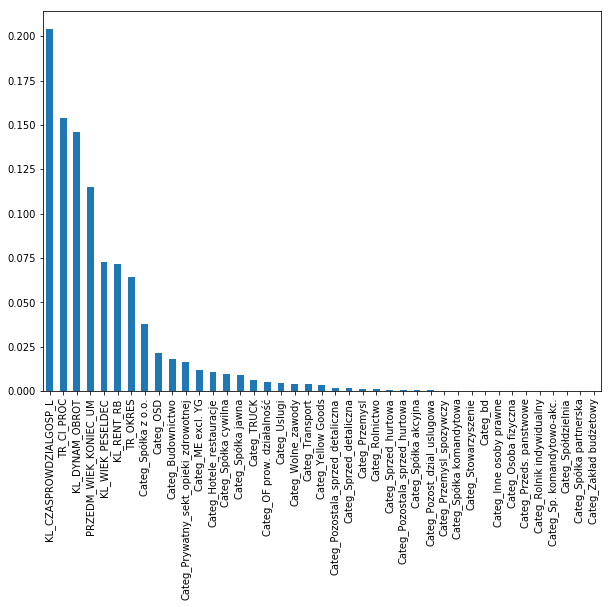

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
#AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions_rf[:,1])
auc_metric = auc(false_positive_rate, true_positive_rate)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, fit_rf[:,1])
auc_metric_fit = auc(false_positive_rate, true_positive_rate)

#Variable Importance
importances = pd.Series(model_rf.feature_importances_, index=df_filtered3_train.columns).sort_values(ascending=False)
print(importances)
print("\n TRN sample: The value of AUC is %.3f." % auc_metric_fit)
print("\n TST sample: The value of AUC is %.3f." % auc_metric)
plt.figure(figsize = (10,7))
importances.plot.bar()
plt.show()

Tunning parametrów z wykorzytaniem CV

In [51]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()

param_grid = { 
    'n_estimators': [50, 100],
    'max_features': ['sqrt', 3,13],
    'max_depth': [3, 6]
}

CV_rfc = GridSearchCV(estimator=rf , param_grid=param_grid, cv= 3, scoring='roc_auc')
CV_rfc.fit(df_filtered3_train,y_train)

#Parameters with Scores
CV_rfc.grid_scores_

#Best Parameters
print(CV_rfc.best_params_)
print( CV_rfc.best_estimator_)

#Make predictions on test set
predictions_rf = CV_rfc.predict_proba(df_filtered3_test)

#AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions_rf[:,1])
auc_metric = auc(false_positive_rate, true_positive_rate)
print(auc_metric)

{'max_depth': 6, 'max_features': 3, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.810755495419


C:\Users\Wojtek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
